In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.applications import ResNet50
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df="/kaggle/input/different-terrain-types-classification/SIH_NN/Desert"
data=[]
for i in os.listdir(df):
    data1=os.path.join(df,i)
    cv=cv2.imread(data1)
    cv1=cv2.resize(cv,(250,250))
    if cv1 is not None:
        data.append(cv1)

In [3]:
new_df=[]
for cur,direc,filename in os.walk("/kaggle/input/different-terrain-types-classification/SIH_NN"):
    for file in filename:
        data=os.path.join(cur,file)
        cv=cv2.imread(data)
        cv1=cv2.resize(cv,(250,250))
        if cv1 is not None:
            new_df.append(cv1)

In [4]:
len(new_df)

3196

In [5]:
new_df1=np.array(new_df)
# df_desert=pd.DataFrame(data_d,columns=["Desert"])
new_df1.shape

(3196, 250, 250, 3)

In [8]:
X=new_df1

In [9]:
d=[]
for i in range(799):
    i=0
    d.append(i)
d=np.array(d)
dg=d.reshape(1,-1)

In [10]:
f=[]
# while(i==800):
#     i=1
#     f.append(i)
for i in range(799):
    j=1
    f.append(j)
f=np.array(f)
fg=f.reshape(1,-1)

In [11]:
m=[]
for _ in range(799):
    i=2
    m.append(i)
m=np.array(m)
mg=m.reshape(1,-1)

In [12]:
p=[]
for _ in range(799):
    i=3
    p.append(i)
p=np.array(p)
pg=p.reshape(1,-1)

In [13]:
len(p)
pg.shape

(1, 799)

In [14]:
dat=np.concatenate((dg,fg,mg,pg),axis=1)
dat.shape

(1, 3196)

In [15]:
result = np.append(dg,fg,axis=1)
result2=np.append(mg,pg,axis=1)
result_final=np.append(result,result2,axis=1)
Y=result_final
Y=Y.reshape(-1,1)
Y.shape

(3196, 1)

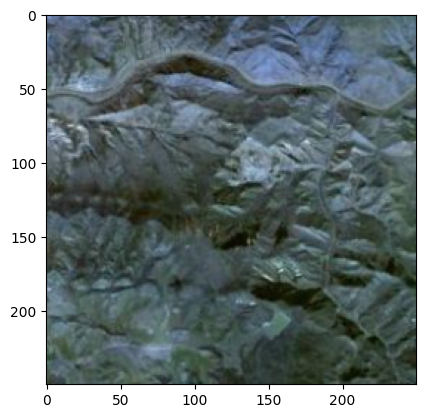

In [16]:
plt.imshow(new_df[10])

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
X_train.shape

(2556, 250, 250, 3)

In [ ]:
# random_classifier=RandomForestClassifier(n_estimators=50)
# random_classifier.fit(X_train,Y_train)
# random_classifier.score(X_test,Y_test)

# # Deep learning

In [19]:
from keras.models import Model
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,Flatten



2024-07-28 05:35:29.955760: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 05:35:29.955877: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 05:35:30.078809: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# # Conv2D layer

In [23]:
inputs=Input(shape=(250, 250, 3))
d1=Conv2D(32,(3,3),activation="relu")(inputs)
d1=Conv2D(64,(3,3),activation="relu")(d1)
m1=MaxPooling2D(2,2)(d1)
f1=Flatten()(m1)
d2=Dense(64,activation="relu")(f1)
output=Dense(1,activation="sigmoid")(d2)
model=Model(inputs,output)

In [24]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
model.fit(X_train,Y_train)

80/80 ━━━━━━━━━━━━━━━━━━━━ 326s 4s/step - accuracy: 0.2533 - loss: -102360952.0000


# # ResNet50 layer

In [37]:
input_shape=(250,250,3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False
inputs=Input(shape=input_shape)
x=base_model(inputs,training=False)
x=Flatten()(x)
x=Dense(64,activation="relu")(x)
output=Dense(1,activation="sigmoid")(x)
model=Model(inputs,output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     8,388,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,976,449 (121.98 MB)

 Trainable params: 8,388,737 (32.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [39]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,Y_train)

80/80 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.2679 - loss: -1966.0040


# # Quantum Machine Learning

In [28]:
!pip install cirq tensorflow_quantum

In [29]:
import cirq
import tensorflow as tf
import tensorflow_quantum as tfq
import sympy 


In [30]:
def convert_to_quantum(X_train):
    qubit=[cirq.GridQubit(0,i)  for i in range(X_train.shape[0])]
    for i,value in enumerate(X_train):
        current=cirq.Circuit([
            cirq.X(qubit(1))
        ])
        return qubit,circuit
def convert_model(X_train):
    qubit=[cirq.GridQubit(0,i) for i in range(X_train.shape[0])]
    for i,values in enumerate(X_train):
        circuit=cirq.Circuit([
            cirq.rx(symbol)(qubit(i))
        ])
        read_out_operator=[cirq.Z(qubit) for qubit in qubits]
        inputs=Input(shape=())
        output=tfq.Layers.PQC(quantum_data,read_out_operator)
        model=Model(inputs,output)
        return model
def convert_to_loss():
    convert=tfq.convert_to_tensor(circuit)
    return convert

